### **INIT**

In [1]:
%%capture
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import itertools
saved_output = []

def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[r]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_gallery_norand(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
#         r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_gallery_predict(images, predict, true, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title('p:' + str(predict[r]) + '   t:' + str(true[r]), size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

In [4]:
loc_collection = '/content/drive/My Drive/Notebook/Auto_Collection_Gray/'
shape = 'Square'
# shape = 'No_Margin'
char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 'ṣād',
    'ḍād', 'ṭā’‬', 'ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
]
import pickle
filename = '/content/drive/My Drive/Notebook/sameratio_keepform.pkl'
sameratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_keepform.pkl'
diffratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/sameratio_diffform.pkl'
sameratio_diffform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_diffform.pkl'
diffratio_diffform = pickle.load(open(filename, 'rb'))

print(sameratio_keepform.keys())
print(diffratio_keepform.keys())
print(sameratio_diffform.keys())
print(diffratio_diffform.keys())

dict_keys(['sk_32_bh', 'sk_32_bw', 'sk_sibh', 'sk_sibw', 'sk_largest'])
dict_keys(['dk_32', 'dk_sibh', 'dk_sibw', 'dk_libh', 'dk_libw'])
dict_keys(['sd_32', 'sd_smallest', 'sd_largest'])
dict_keys(['dd_32', 'dd_sibh', 'dd_sibw', 'dd_libh', 'dd_libw'])


In [5]:
data_dk = []
label_dk = []
for i in range(0,28):
    for x in range(len(diffratio_keepform['dk_32'][i])):
        gd = diffratio_keepform['dk_32'][i][x]
        data_dk.append(diffratio_keepform['dk_32'][i][x])
        label_dk.append(i)
data_dk = np.array(data_dk)
label_dk = np.array(label_dk)

data_sk = []
data_sk_temp = []
label_sk = []
for i in range(0,28):
    for x in range(len(sameratio_keepform['sk_32_bh'][i])):
        data_sk_temp.append(sameratio_keepform['sk_32_bh'][i][x])
        label_sk.append(i)
for x in range(len(data_sk_temp)):
    h, w = data_sk_temp[x].shape
    if h and w > 32:
        img = cv2.resize(data_sk_temp[x], (32, 32))
        print(x)
    else:
        img = data_sk_temp[x]
    y = list(img.ravel())
    y = np.array(y)
    data_sk.append(y.reshape(32, 32))
data_sk = np.array(data_sk)
label_sk = np.array(label_sk)

data_sd = []
label_sd = []
for i in range(0,28):
    for x in range(len(sameratio_diffform['sd_largest'][i])):
        data_sd.append(sameratio_diffform['sd_largest'][i][x])
        label_sd.append(i)
data_sd = np.array(data_sd)
label_sd = np.array(label_sd)
data_sd_32 = []
for data in data_sd:
  data_sd_32.append(cv2.resize(data, (32,32)))
data_sd_32 = np.array(data_sd_32)
data_sd = data_sd_32

data_dd = []
label_dd = []
for i in range(0,28):
    for x in range(len(diffratio_diffform['dd_32'][i])):
        data_dd.append(diffratio_diffform['dd_32'][i][x])
        label_dd.append(i)
data_dd = np.array(data_dd)
label_dd = np.array(label_dd)

1311


sameratio_keepform


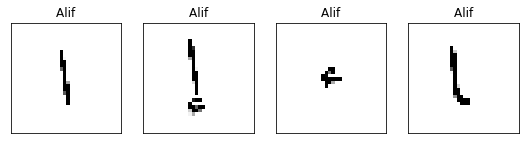

diffratio_keepform


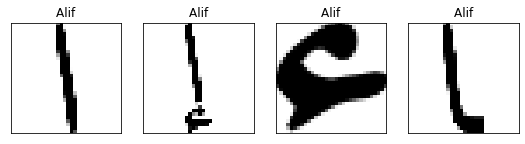

sameratio_diffform


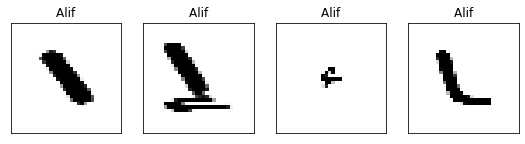

diffratio_diffform


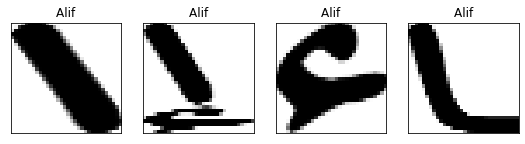

In [6]:
print('sameratio_keepform')
plot_gallery_norand(data_sk, label_sk, 1, 4)
print('diffratio_keepform')
plot_gallery_norand(data_dk, label_dk, 1, 4)
print('sameratio_diffform')
plot_gallery_norand(data_sd, label_sd, 1, 4)
print('diffratio_diffform')
plot_gallery_norand(data_dd, label_dd, 1, 4)

### **Data**

(1452, 32, 32)
(1452,)


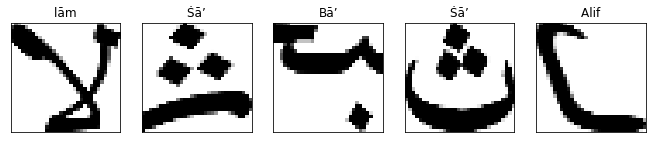

In [7]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42

dtype = 'DD'
data_train, data_test, y_train, y_test = train_test_split(
data_dd, label_dd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [8]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


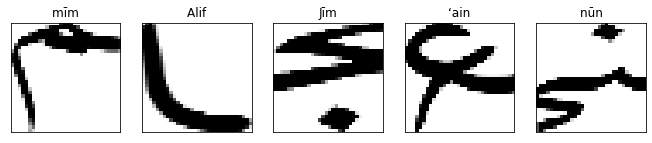

Testing Data 363


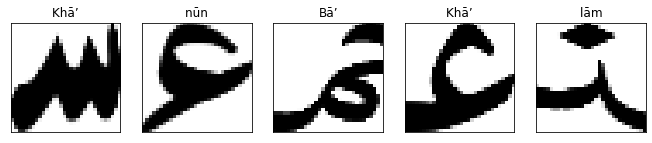

In [9]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [10]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

### **Model**

In [11]:
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical
import keras
import keras.backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization, MaxPooling2D
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU, AveragePooling2D
import numpy
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

Using TensorFlow backend.


In [12]:
def Najadat(n_classes):
  model = Sequential()
  # Conv1
  model.add(Conv2D(filters = 16,
                    kernel_size = 5,
                    activation = 'relu', 
                    input_shape = (32,32,1)))
  # Conv2
  model.add(Conv2D(filters = 16,
                    kernel_size = 5,
                    activation = 'relu'))
  # Pool1
  model.add(MaxPooling2D(pool_size = 2, strides = 2))
  # Conv3
  model.add(Conv2D(filters = 32,
                    kernel_size = 5,
                    activation = 'relu', 
                    input_shape = (32,32,1)))
  # Conv4
  model.add(Conv2D(filters = 32,
                    kernel_size = 5,
                    activation = 'relu', 
                    input_shape = (32,32,1)))
  # Pool2
  model.add(MaxPooling2D(pool_size = 2, strides = 2))
  # 3FC
  model.add(Flatten())
  model.add(Dense(units = 64, 
                  activation = 'relu',
                  kernel_regularizer='l2'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  model.add(Dense(units = 32, 
                  activation = 'relu',
                  kernel_regularizer='l2'))
  model.add(Dropout(0.1))
  model.add(BatchNormalization())
  #Output Layer
  model.add(Dense(units = 28, activation = 'softmax'))

  # Compile model
  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [13]:
%%time
n_classes = 28
ep = 50
bs = 64

K.clear_session()
model = Najadat(n_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [14]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('Najadat')
    filename = '/content/drive/My Drive/Notebook/Training_Files/Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 8s 7ms/step - loss: 4.8260 - accuracy: 0.0500 - val_loss: 4.4868 - val_accuracy: 0.0378
Epoch 2/50
1161/1161 [==============================] - 0s 143us/step - loss: 4.3903 - accuracy: 0.0792 - val_loss: 4.3294 - val_accuracy: 0.0859
Epoch 3/50
1161/1161 [==============================] - 0s 150us/step - loss: 4.1015 - accuracy: 0.1240 - val_loss: 4.2111 - val_accuracy: 0.0790
Epoch 4/50
1161/1161 [==============================] - 0s 141us/step - loss: 3.7715 - accuracy: 0.1869 - val_loss: 4.1133 - val_accuracy: 0.0859
Epoch 5/50
1161/1161 [==============================] - 0s 146us/step - loss: 3.5407 - accuracy: 0.2429 - val_loss: 4.0243 - val_accuracy: 0.0997
Epoch 6/50
1161/1161 [==============================] - 0s 152us/step - loss: 3.2594 - accuracy: 0.3066 - val_loss: 3.9528 - val_accuracy: 0.0997
Epoch 7/50
1161/1161 [==============================] - 0s 142us/step - 

### **Result**

k =  1


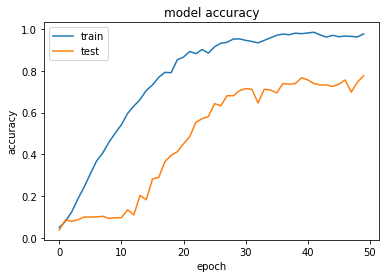

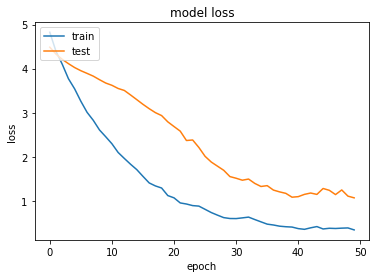

k =  2


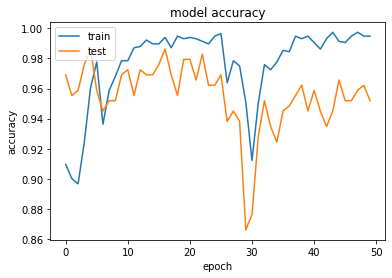

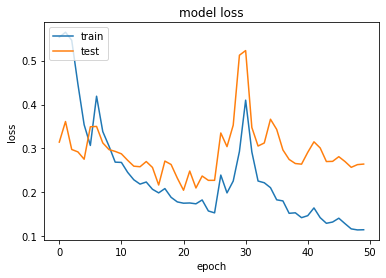

k =  3


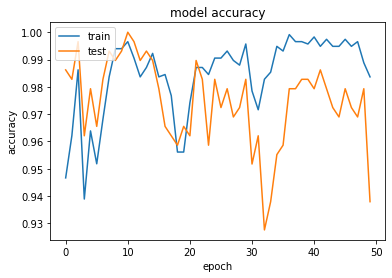

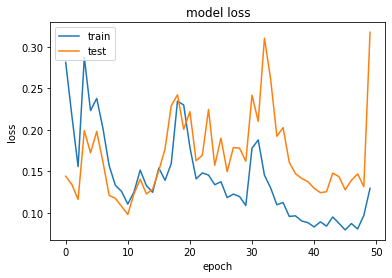

k =  4


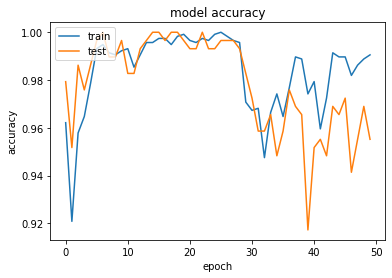

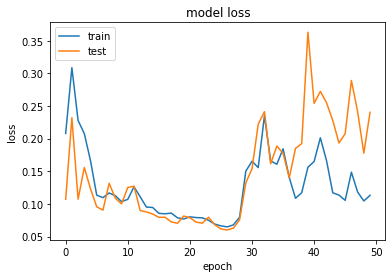

k =  5


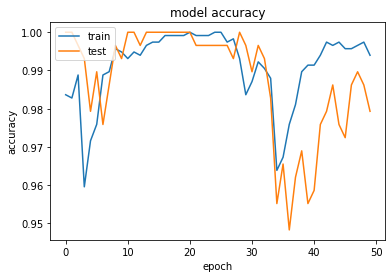

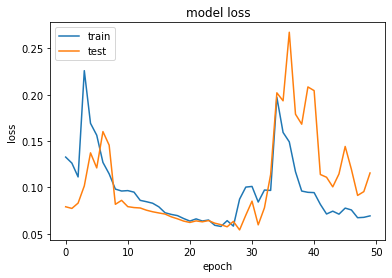

In [15]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.71      0.80      0.75        15
           2       0.89      0.96      0.92        25
           3       0.89      0.84      0.86        19
           4       0.85      0.96      0.90        23
           5       0.82      0.75      0.78        24
           6       0.82      0.86      0.84        21
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      0.75      0.86         8
          12       0.87      0.81      0.84        16
          13       0.85      1.00      0.92        11
          14       1.00      0.82      0.90        11
          15       1.00      0.82      0.90        11
          16       0.83      1.00      0.91         5
          17       0.86    

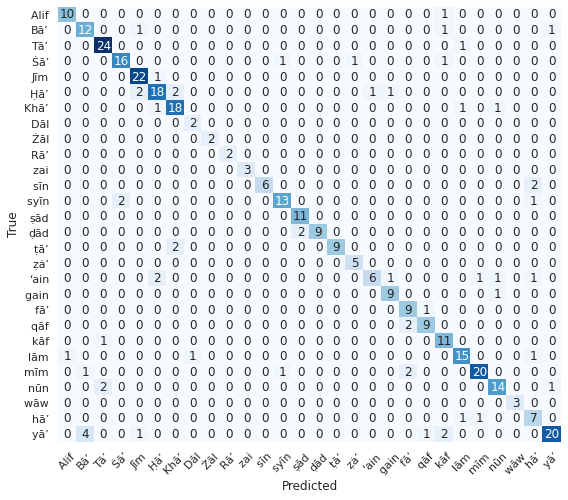

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next DK**

In [17]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


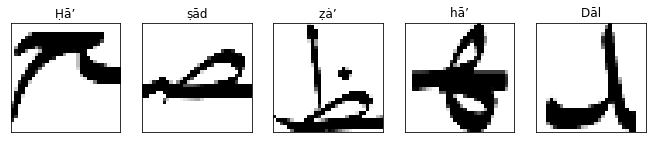

In [18]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'DK'
data_train, data_test, y_train, y_test = train_test_split(
data_dk, label_dk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [19]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


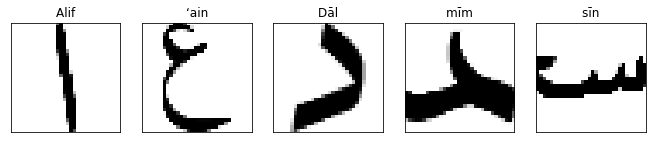

Testing Data 363


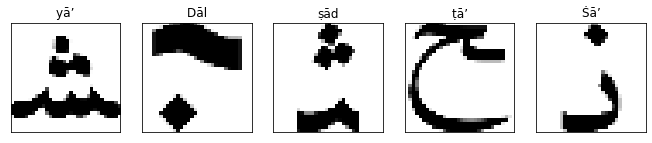

In [20]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [21]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [22]:
%%time
K.clear_session()
model = Najadat(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('Najadat')
    filename = '/content/drive/My Drive/Notebook/Training_Files/Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 1s 617us/step - loss: 4.8219 - accuracy: 0.0500 - val_loss: 4.3866 - val_accuracy: 0.0619
Epoch 2/50
1161/1161 [==============================] - 0s 158us/step - loss: 4.3551 - accuracy: 0.0792 - val_loss: 4.2448 - val_accuracy: 0.0653
Epoch 3/50
1161/1161 [==============================] - 0s 152us/step - loss: 3.9286 - accuracy: 0.1404 - val_loss: 4.1187 - val_accuracy: 0.1409
Epoch 4/50
1161/1161 [==============================] - 0s 156us/step - loss: 3.5811 - accuracy: 0.2343 - val_loss: 4.0091 - val_accuracy: 0.1856
Epoch 5/50
1161/1161 [==============================] - 0s 156us/step - loss: 3.2849 - accuracy: 0.2903 - val_loss: 3.9305 - val_accuracy: 0.1443
Epoch 6/50
1161/1161 [==============================] - 0s 151us/step - loss: 3.0579 - accuracy: 0.3325 - val_loss: 3.8541 - val_accuracy: 0.1581
Epoch 7/50
1161/1161 [==============================] - 0s 153us/step 

k =  1


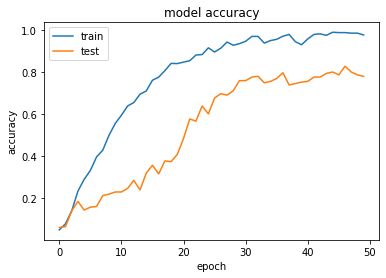

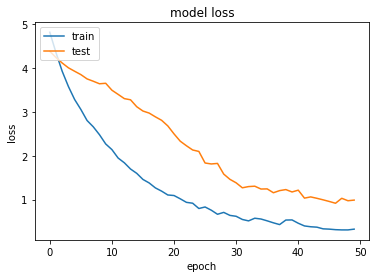

k =  2


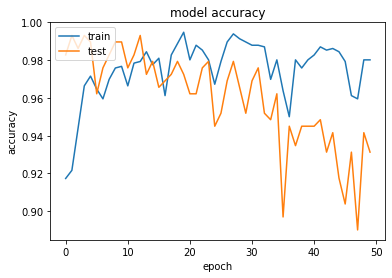

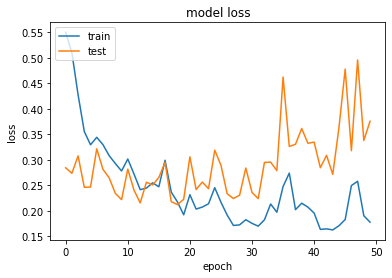

k =  3


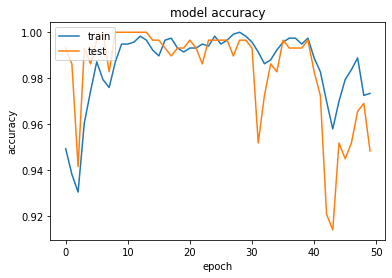

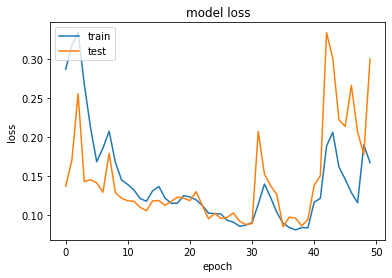

k =  4


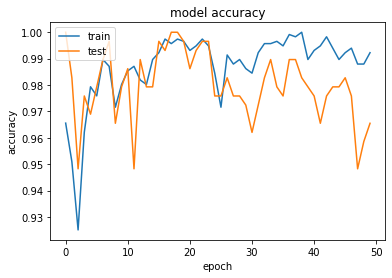

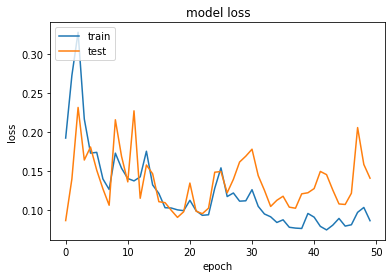

k =  5


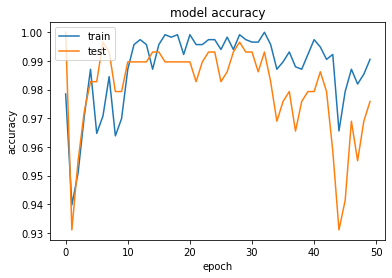

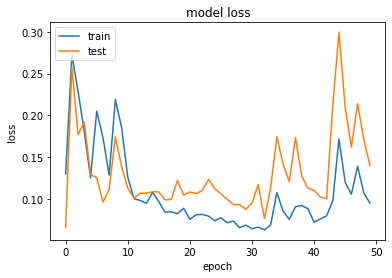

In [23]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.55      0.80      0.65        15
           2       0.83      0.76      0.79        25
           3       0.89      0.84      0.86        19
           4       0.78      0.91      0.84        23
           5       0.90      0.75      0.82        24
           6       0.86      0.86      0.86        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         8
          12       0.93      0.88      0.90        16
          13       0.79      1.00      0.88        11
          14       0.88      0.64      0.74        11
          15       0.92      1.00      0.96        11
          16       0.83      1.00      0.91         5
          17       0.55    

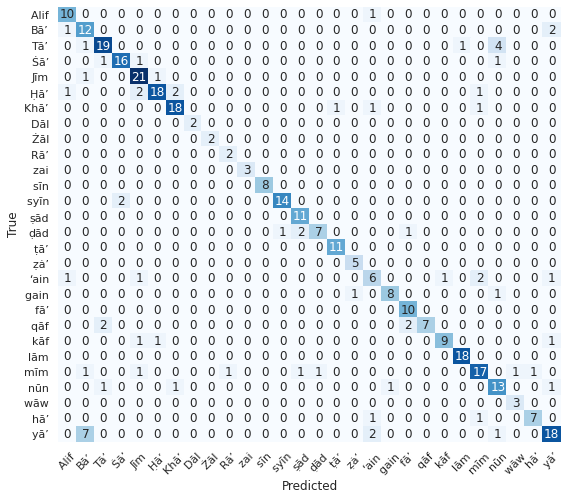

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SK**

In [25]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


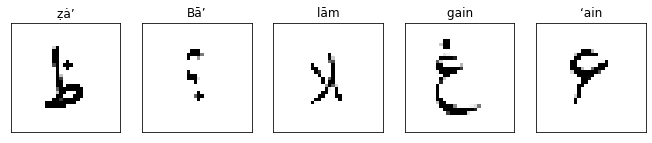

In [26]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SK'
data_train, data_test, y_train, y_test = train_test_split(
data_sk, label_sk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [27]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


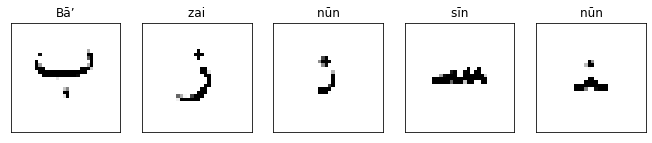

Testing Data 363


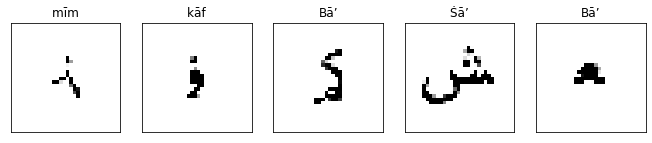

In [28]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [29]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [30]:
%%time
K.clear_session() 
model = Najadat(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('Najadat')
    filename = '/content/drive/My Drive/Notebook/Training_Files/Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 1s 654us/step - loss: 4.7962 - accuracy: 0.0629 - val_loss: 4.4417 - val_accuracy: 0.0619
Epoch 2/50
1161/1161 [==============================] - 0s 163us/step - loss: 4.1110 - accuracy: 0.1352 - val_loss: 4.2917 - val_accuracy: 0.0859
Epoch 3/50
1161/1161 [==============================] - 0s 161us/step - loss: 3.6263 - accuracy: 0.2394 - val_loss: 4.1831 - val_accuracy: 0.0722
Epoch 4/50
1161/1161 [==============================] - 0s 152us/step - loss: 3.3188 - accuracy: 0.3023 - val_loss: 4.0732 - val_accuracy: 0.0928
Epoch 5/50
1161/1161 [==============================] - 0s 149us/step - loss: 3.0299 - accuracy: 0.3712 - val_loss: 3.9875 - val_accuracy: 0.0859
Epoch 6/50
1161/1161 [==============================] - 0s 148us/step - loss: 2.7279 - accuracy: 0.4643 - val_loss: 3.9137 - val_accuracy: 0.0790
Epoch 7/50
1161/1161 [==============================] - 0s 155us/step 

k =  1


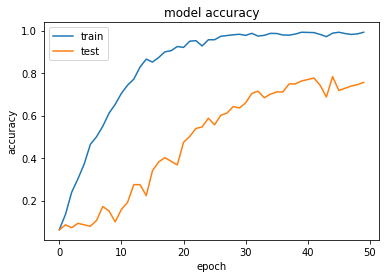

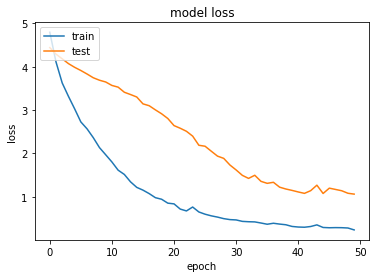

k =  2


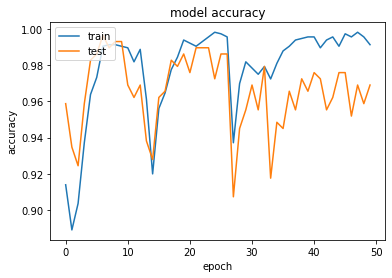

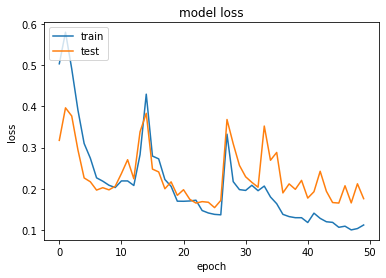

k =  3


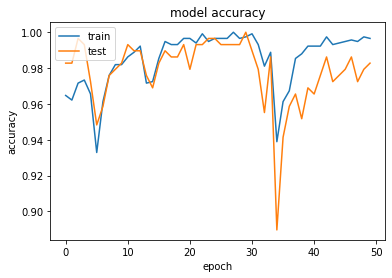

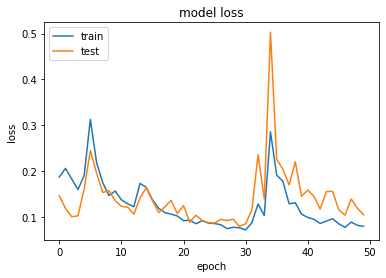

k =  4


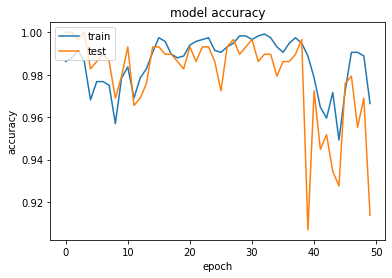

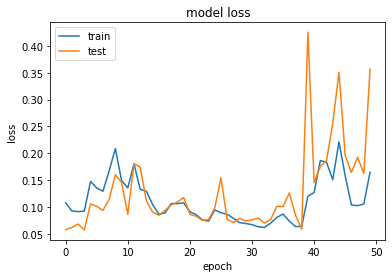

k =  5


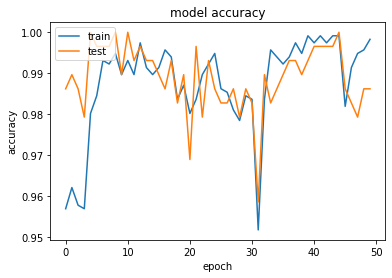

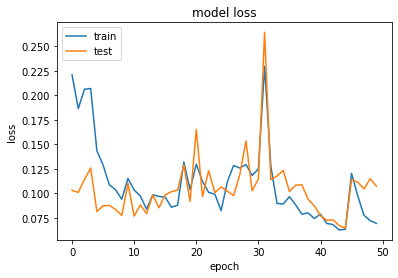

In [31]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.58      0.93      0.72        15
           2       0.84      0.84      0.84        25
           3       0.72      0.95      0.82        19
           4       0.76      0.96      0.85        23
           5       0.93      0.54      0.68        24
           6       0.78      0.86      0.82        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.50      1.00      0.67         2
          10       1.00      1.00      1.00         3
          11       0.89      1.00      0.94         8
          12       1.00      0.81      0.90        16
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         5
          17       0.78    

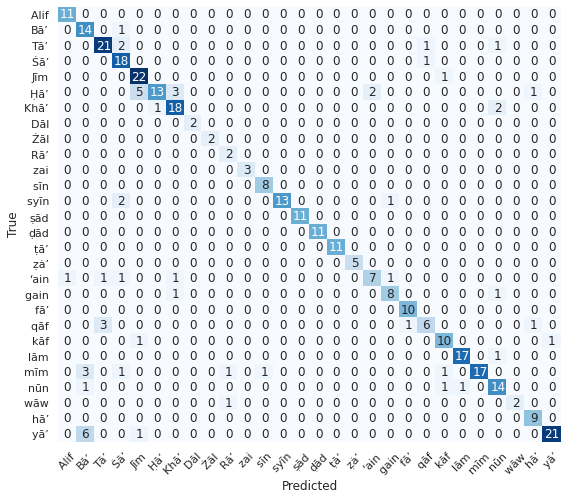

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SD**

In [33]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


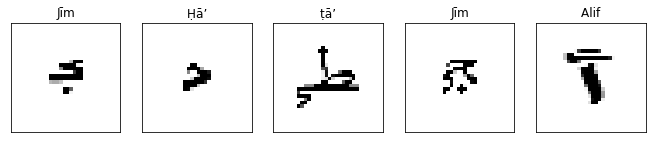

In [34]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SD'
data_train, data_test, y_train, y_test = train_test_split(
data_sd, label_sd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [35]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


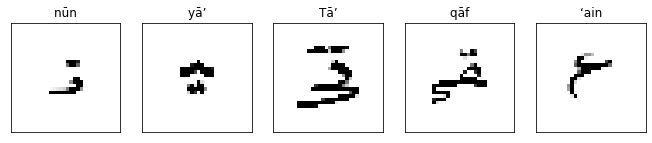

Testing Data 363


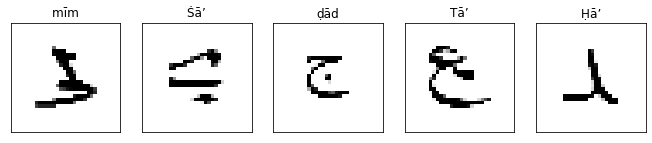

In [36]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [37]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [38]:
%%time
K.clear_session() 
model = Najadat(n_classes)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('Najadat')
    filename = '/content/drive/My Drive/Notebook/Training_Files/Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 1s 638us/step - loss: 4.8264 - accuracy: 0.0517 - val_loss: 4.4349 - val_accuracy: 0.0378
Epoch 2/50
1161/1161 [==============================] - 0s 153us/step - loss: 4.2698 - accuracy: 0.1059 - val_loss: 4.2630 - val_accuracy: 0.0653
Epoch 3/50
1161/1161 [==============================] - 0s 145us/step - loss: 3.8116 - accuracy: 0.1680 - val_loss: 4.1362 - val_accuracy: 0.0481
Epoch 4/50
1161/1161 [==============================] - 0s 153us/step - loss: 3.4615 - accuracy: 0.2550 - val_loss: 4.0370 - val_accuracy: 0.0481
Epoch 5/50
1161/1161 [==============================] - 0s 143us/step - loss: 3.1514 - accuracy: 0.3264 - val_loss: 3.9436 - val_accuracy: 0.0515
Epoch 6/50
1161/1161 [==============================] - 0s 143us/step - loss: 2.8295 - accuracy: 0.4238 - val_loss: 3.8654 - val_accuracy: 0.0481
Epoch 7/50
1161/1161 [==============================] - 0s 151us/step 

k =  1


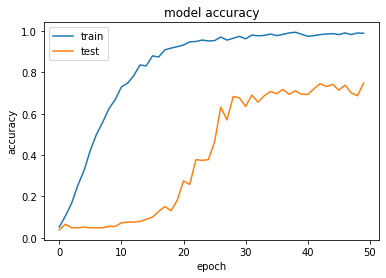

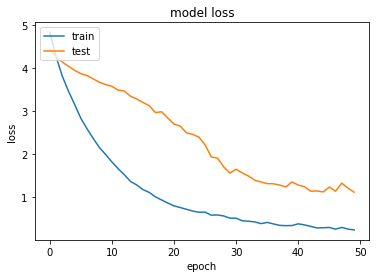

k =  2


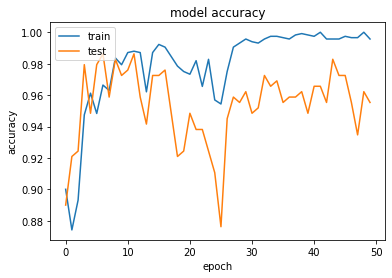

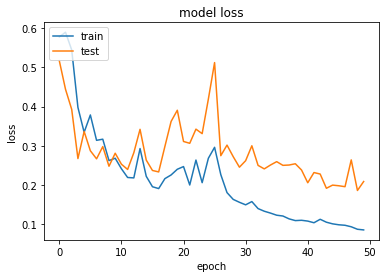

k =  3


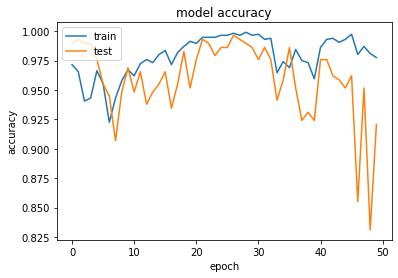

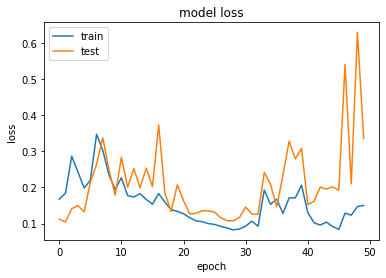

k =  4


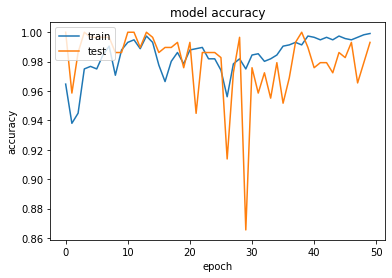

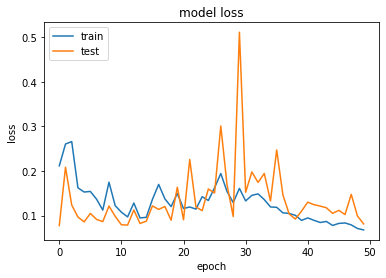

k =  5


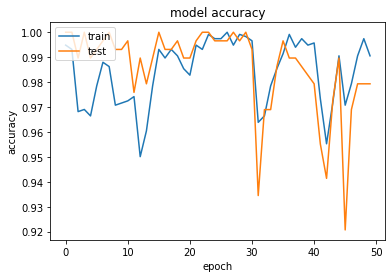

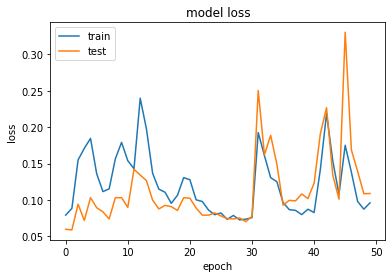

In [39]:
# summarize history for accuracy
sns.reset_orig()
filename = '/content/drive/My Drive/Notebook/Training_Files/history_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.54      0.93      0.68        15
           2       0.78      0.84      0.81        25
           3       0.65      0.68      0.67        19
           4       0.71      0.74      0.72        23
           5       0.85      0.46      0.59        24
           6       0.64      0.76      0.70        21
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       0.50      0.50      0.50         2
          10       1.00      1.00      1.00         3
          11       0.70      0.88      0.78         8
          12       0.87      0.81      0.84        16
          13       0.85      1.00      0.92        11
          14       0.89      0.73      0.80        11
          15       1.00      0.82      0.90        11
          16       1.00      1.00      1.00         5
          17       0.75    

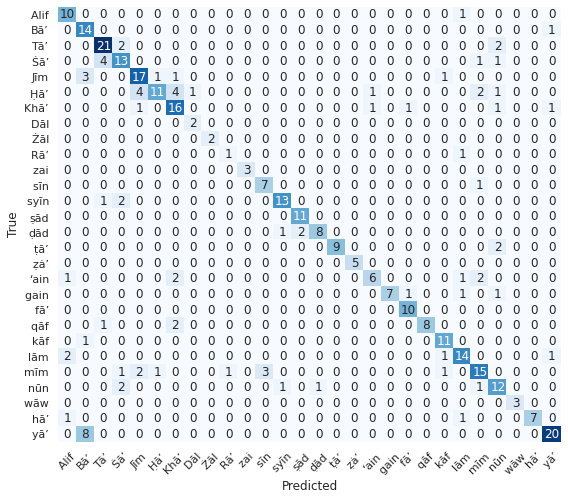

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_Najadat_'+str(dtype)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)